In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')

nifty50 = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_500')[2]

print(nifty50)

nifty50['Symbol'] = nifty50[3].str.replace('.', '-')

symbols_list = nifty50['Symbol'].unique().tolist()

end_date = '2024-07-15'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

df = yf.download(tickers=symbols_list, start=start_date, end=end_date).stack()

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()

df


         0                                   1  \
0    Sl.No                        Company Name   
1        1                    360 ONE WAM Ltd.   
2        2                       3M India Ltd.   
3        3                      ABB India Ltd.   
4        4                            ACC Ltd.   
..     ...                                 ...   
498    498  Zee Entertainment Enterprises Ltd.   
499    499             Zensar Technolgies Ltd.   
500    500                         Zomato Ltd.   
501    501             Zydus Lifesciences Ltd.   
502    502                eClerx Services Ltd.   

                                     2           3       4             5  
0                             Industry      Symbol  Series     ISIN Code  
1                   Financial Services      360ONE      EQ  INE466L01038  
2                          Diversified     3MINDIA      EQ  INE470A01017  
3                        Capital Goods         ABB      EQ  INE117A01022  
4               Construc

[****                   8%%                      ]  42 of 503 completed

$CAMS: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[*****************     35%%                      ]  176 of 503 completed

$AWL: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[**********************56%%*                     ]  281 of 503 completed

$PEL: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[**********************75%%**********            ]  375 of 503 completed

$LTF: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[**********************79%%************          ]  399 of 503 completed

$FSL: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[**********************81%%*************         ]  405 of 503 completed

$IOC: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[**********************84%%**************        ]  423 of 503 completed

$SBFC: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[**********************86%%***************       ]  434 of 503 completed

$BBTC: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[**********************90%%*****************     ]  454 of 503 completed

$EPL: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[**********************99%%**********************]  497 of 503 completed

$JWL: possibly delisted; No price data found  (1d 2016-07-17 00:00:00 -> 2024-07-15)


[*********************100%%**********************]  502 of 503 completed

468 Failed downloads:
['WHIRLPOOL', 'ASTRAL', 'ESCORTS', 'POWERGRID', 'NUVOCO', 'CREDITACC', 'CHOLAHLDNG', 'CHOLAFIN', 'TANLA', 'GODREJIND', 'BALAMINES', 'METROPOLIS', 'NATIONALUM', 'CGCL', 'PGHH', 'EASEMYTRIP', 'OFSS', 'BRITANNIA', 'MAHSEAMLES', 'ASAHIINDIA', 'SAREGAMA', 'HINDPETRO', 'BIKAJI', 'VIJAYA', 'USHAMART', 'MANAPPURAM', 'ASHOKLEY', 'LXCHEM', 'COROMANDEL', 'RAILTEL', 'TATAMTRDVR', 'GILLETTE', 'JKPAPER', 'ECLERX', 'FDC', 'PNCINFRA', 'SUNTECK', 'LAURUSLABS', 'COALINDIA', 'FEDERALBNK', 'RAYMOND', 'DEEPAKFERT', '3MINDIA', 'ALOKINDS', 'JKLAKSHMI', 'DEVYANI', 'J&KBANK', 'SJVN', 'GAIL', 'SHRIRAMFIN', 'UNOMINDA', 'RATNAMANI', 'CHENNPETRO', 'CGPOWER', 'LTTS', 'LODHA', 'FLUOROCHEM', 'JKCEMENT', 'BLUEDART', 'KPIL', 'HAPPYFORGE', 'FORTIS', 'PAYTM', 'BAJAJHLDNG', 'MASTEK', 'AMBER', 'M&M', 'TATAPOWER', 'SIGNATURE', 'NUVAMA', 'HONAUT', 'GPIL', 'KPRMILL', 'APLAPOLLO', 'FINEORG', 'BORORENEW', 'TATACHEM', 'MHRIL', 'GLAND'

Price              adj close      close       high        low       open  \
date       ticker                                                          
2016-07-18 BDL     21.706259  24.450001  24.450001  23.809999  23.809999   
           BLS      0.136400   0.136400   0.136400   0.136400   0.136400   
           CCL     40.361691  45.619999  45.970001  45.419998  45.430000   
           HAL     39.514149  45.610001  45.610001  44.900002  45.169998   
           IDEA     0.009000   0.009000   0.009000   0.009000   0.009000   
...                      ...        ...        ...        ...        ...   
2024-07-12 MMTC     0.000100   0.000100   0.000100   0.000100   0.000100   
           NBCC    23.191999  23.191999  23.191999  23.191999  23.191999   
           PFC     22.139999  22.139999  22.299999  21.850000  22.270000   
           RBA     79.440002  79.440002  79.870003  78.720001  79.099998   
           TCS      0.550000   0.550000   0.560000   0.510000   0.560000   

Price                 volume  
date       ticker             
2016-07-18 BDL        1000.0  
           BLS        2460.0  
           CCL     3072100.0  
           HAL     6105900.0  
           IDEA      15500.0  
...                      ...  
2024-07-12 MMTC          0.0  
           NBCC          0.0  
           PFC      136900.0  
           RBA      659700.0  
           TCS      152400.0  

[34576 rows x 6 columns]

In [2]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=0)['adj close'].transform(lambda x: ta.rsi(df['close'], length=14))

if len(df['close'].dropna()) >= 20:  # Ensure there are at least 20 non-NaN values
    bbands = ta.bbands(df['close'], length=20)
    if bbands is not None:
      df['bb_upper'], df['bb_middle'], df['bb_lower'] = bbands.iloc[:, 0], bbands.iloc[:, 1], bbands.iloc[:, 2]
    else:
      print("Bollinger Bands calculation returned None for ticker:", df.name)
else:
    print("Not enough data to calculate Bollinger Bands for ticker:", df.name)

df['atr'] = ta.atr(df['high'], df['low'], df['close'], length=14)

if len(df['close'].dropna()) >= 26:  # Ensure there are at least 26 non-NaN values
    macd = ta.macd(df['close'])
    if macd is not None:
      df['macd'], df['macd_signal'], df['macd_hist'] = macd.iloc[:, 0], macd.iloc[:, 1], macd.iloc[:, 2]
    else:
      print("MACD calculation returned None for ticker:", df.name)
else:
    print("Not enough data to calculate MACD for ticker:", df.name)

df['rupee_volume'] = df['close'] * df['volume'] / 1e6

df

Price              adj close      close       high        low       open  \
date       ticker                                                          
2016-07-18 BDL     21.706259  24.450001  24.450001  23.809999  23.809999   
           BLS      0.136400   0.136400   0.136400   0.136400   0.136400   
           CCL     40.361691  45.619999  45.970001  45.419998  45.430000   
           HAL     39.514149  45.610001  45.610001  44.900002  45.169998   
           IDEA     0.009000   0.009000   0.009000   0.009000   0.009000   
...                      ...        ...        ...        ...        ...   
2024-07-12 MMTC     0.000100   0.000100   0.000100   0.000100   0.000100   
           NBCC    23.191999  23.191999  23.191999  23.191999  23.191999   
           PFC     22.139999  22.139999  22.299999  21.850000  22.270000   
           RBA     79.440002  79.440002  79.870003  78.720001  79.099998   
           TCS      0.550000   0.550000   0.560000   0.510000   0.560000   

Price                 volume  garman_klass_vol        rsi   bb_upper  \
date       ticker                                                      
2016-07-18 BDL        1000.0         -0.002954        NaN        NaN   
           BLS        2460.0          0.000000        NaN        NaN   
           CCL     3072100.0         -0.005333        NaN        NaN   
           HAL     6105900.0         -0.006790        NaN        NaN   
           IDEA      15500.0          0.000000        NaN        NaN   
...                      ...               ...        ...        ...   
2024-07-12 MMTC          0.0          0.000000  47.630678 -81.932910   
           NBCC          0.0          0.000000  49.313821 -82.580978   
           PFC      136900.0          0.000195  49.236518 -80.541090   
           RBA      659700.0          0.000098  53.511154 -60.958059   
           TCS      152400.0          0.004248  47.571677 -62.748781   

Price              bb_middle    bb_lower        atr      macd  macd_signal  \
date       ticker                                                            
2016-07-18 BDL           NaN         NaN        NaN       NaN          NaN   
           BLS           NaN         NaN        NaN       NaN          NaN   
           CCL           NaN         NaN        NaN       NaN          NaN   
           HAL           NaN         NaN        NaN       NaN          NaN   
           IDEA          NaN         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2024-07-12 MMTC     35.82236  153.577630  53.957228  0.102390    -1.569229   
           NBCC     35.30096  153.182898  51.759705 -0.705801    -1.901936   
           PFC      36.40716  153.355410  48.158440 -1.414877    -2.088809   
           RBA      30.20516  121.368380  48.842123  2.616644     1.554169   
           TCS      29.23816  121.225102  50.991257 -0.547796    -1.288216   

Price              macd_hist  rupee_volume  
date       ticker                           
2016-07-18 BDL           NaN      0.024450  
           BLS           NaN      0.000336  
           CCL           NaN    140.149199  
           HAL           NaN    278.490103  
           IDEA          NaN      0.000139  
...                      ...           ...  
2024-07-12 MMTC     1.671619      0.000000  
           NBCC     1.196135      0.000000  
           PFC      0.673932      3.030966  
           RBA      1.062475     52.406570  
           TCS      0.740421      0.083820  

[34576 rows x 16 columns]

In [3]:
last_cols = [c for c in df.columns.unique(0) if c not in ['rupee_volume', 'volume', 'open',
                                                          'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['rupee_volume'].resample('M').mean().stack('ticker').to_frame('rupee_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data

rupee_volume  adj close  garman_klass_vol        rsi  \
date       ticker                                                         
2016-07-31 BDL         0.073130  21.102564         -0.005473  48.172595   
           BLS         0.000184   0.173600          0.000000  48.128383   
           CCL       154.546493  41.334900         -0.005702  48.229319   
           HAL       379.972794  37.824764         -0.004050  48.222675   
           IDEA        0.000018   0.009000          0.000000  48.120848   
...                         ...        ...               ...        ...   
2024-07-31 RBA        62.431968  79.440002          0.000098  53.511154   
           TCS         0.126557   0.550000          0.004248  47.571677   
           ACI        47.419368  19.385181         -0.000019  49.053864   
           NBCC        0.003793  23.191999          0.000000  49.313821   
           ATGL        0.007403   2.970000          0.000113  47.790860   

                       bb_upper    bb_middle      bb_lower          atr  \
date       ticker                                                         
2016-07-31 BDL    -13116.917852  1731.127925  16579.173703  1992.727027   
           BLS    -13117.512810  1730.721855  16578.956520  1852.074834   
           CCL    -13116.599480  1731.349385  16579.298250  1723.124942   
           HAL    -13113.661958  1733.360885  16580.383729  1600.369585   
           IDEA   -13115.320490  1732.227835  16579.776161  1489.175397   
...                         ...          ...           ...          ...   
2024-07-31 RBA       -60.958059    30.205160    121.368380    48.842123   
           TCS       -62.748781    29.238160    121.225102    50.991257   
           ACI       -61.211237    29.673510    120.558256    48.325132   
           NBCC      -82.580978    35.300960    153.182898    51.759705   
           ATGL      -60.877842    29.822005    120.521852    46.060622   

                         macd  macd_signal   macd_hist  
date       ticker                                       
2016-07-31 BDL    -469.943984  -194.381269 -275.562715  
           BLS    -473.135065  -158.057880 -315.077185  
           CCL    -466.530244  -121.162448 -345.367797  
           HAL    -456.283046   -88.732199 -367.550847  
           IDEA   -446.536938   -63.188873 -383.348065  
...                       ...          ...         ...  
2024-07-31 RBA       2.616644     1.554169    1.062475  
           TCS      -0.547796    -1.288216    0.740421  
           ACI      -1.429733    -1.763265    0.333532  
           NBCC     -0.705801    -1.901936    1.196135  
           ATGL     -3.470268    -3.043040   -0.427228  

[1707 rows x 11 columns]

In [4]:
data['rupee_volume'] = (data.loc[:, 'rupee_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['rupee_vol_rank'] = (data.groupby('date')['rupee_volume'].rank(ascending=False))

data = data[data['rupee_vol_rank']<150].drop(['rupee_volume', 'rupee_vol_rank'], axis=1)

data

adj close  garman_klass_vol        rsi      bb_upper  \
date       ticker                                                         
2017-06-30 BDL     27.013729          0.000921  48.147089 -19853.232486   
           BLS      0.210000          0.000000  48.125111 -19861.863581   
           CCL     59.597771         -0.003648  48.180630 -19872.988615   
           HAL     37.557003         -0.006438  48.161215 -19870.248948   
           IDEA     0.021780          0.000000  48.122219 -19873.339812   
...                      ...               ...        ...           ...   
2024-07-31 PFC     22.139999          0.000195  49.236518    -80.541090   
           RBA     79.440002          0.000098  53.511154    -60.958059   
           TCS      0.550000          0.004248  47.571677    -62.748781   
           ACI     19.385181         -0.000019  49.053864    -61.211237   
           NBCC    23.191999          0.000000  49.313821    -82.580978   

                     bb_middle      bb_lower          atr        macd  \
date       ticker                                                       
2017-06-30 BDL     3234.116403  26321.465292  5086.618784 -325.310415   
           BLS     3228.548403  26318.960388  4725.431013 -470.966928   
           CCL     3221.299403  26315.587421  4392.598798 -574.504232   
           HAL     3223.062653  26316.374254  4080.503884 -650.899735   
           IDEA    3221.074492  26315.488797  3792.088479 -706.741428   
...                        ...           ...          ...         ...   
2024-07-31 PFC       36.407160    153.355410    48.158440   -1.414877   
           RBA       30.205160    121.368380    48.842123    2.616644   
           TCS       29.238160    121.225102    50.991257   -0.547796   
           ACI       29.673510    120.558256    48.325132   -1.429733   
           NBCC      35.300960    153.182898    51.759705   -0.705801   

                   macd_signal   macd_hist  
date       ticker                           
2017-06-30 BDL     -136.507570 -188.802845  
           BLS     -225.731267 -245.235661  
           CCL     -263.414856 -311.089375  
           HAL     -271.848287 -379.051447  
           IDEA    -262.151985 -444.589443  
...                        ...         ...  
2024-07-31 PFC       -2.088809    0.673932  
           RBA        1.554169    1.062475  
           TCS       -1.288216    0.740421  
           ACI       -1.763265    0.333532  
           NBCC      -1.901936    1.196135  

[1365 rows x 10 columns]

In [5]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

adj close  garman_klass_vol        rsi      bb_upper  \
date       ticker                                                          
2018-06-30 BDL      24.911179          0.000866  48.162763 -12360.570864   
           CCL      53.508331         -0.001511  48.196863 -12358.933411   
           HAL      40.279579         -0.005724  48.182813 -12356.251756   
           IDEA      0.028000          0.000000  48.127269 -12358.204259   
           IEX     126.757477         -0.001889  48.321669 -12352.490743   
...                       ...               ...        ...           ...   
2024-07-31 PFC      22.139999          0.000195  49.236518    -80.541090   
           RBA      79.440002          0.000098  53.511154    -60.958059   
           TCS       0.550000          0.004248  47.571677    -62.748781   
           ACI      19.385181         -0.000019  49.053864    -61.211237   
           NBCC     23.191999          0.000000  49.313821    -82.580978   

                    bb_middle      bb_lower          atr        macd  \
date       ticker                                                      
2018-06-30 BDL     1634.69436  15629.959584  3521.876525 -480.031597   
           CCL     1635.82036  15630.574131  3272.498916 -535.176981   
           HAL     1637.65686  15631.565476  3039.628993 -573.260379   
           IDEA    1636.32326  15630.850779  2825.729208 -600.157214   
           IEX     1640.28926  15633.069263  2633.778693 -603.505774   
...                       ...           ...          ...         ...   
2024-07-31 PFC       36.40716    153.355410    48.158440   -1.414877   
           RBA       30.20516    121.368380    48.842123    2.616644   
           TCS       29.23816    121.225102    50.991257   -0.547796   
           ACI       29.67351    120.558256    48.325132   -1.429733   
           NBCC      35.30096    153.182898    51.759705   -0.705801   

                   macd_signal   macd_hist  return_1m  return_2m  return_3m  \
date       ticker                                                             
2018-06-30 BDL     -403.538800  -76.492797   0.045541   0.050813   0.047056   
           CCL     -366.947347 -168.229634  -0.079801  -0.042975  -0.041461   
           HAL     -324.024596 -249.235783  -0.090676  -0.076121  -0.012295   
           IDEA    -280.737145 -319.420069   0.000000  -0.105573   0.038499   
           IEX     -227.268564 -376.237210  -0.015864   0.012063  -0.013288   
...                        ...         ...        ...        ...        ...   
2024-07-31 PFC       -2.088809    0.673932   0.082111   0.059853   0.050855   
           RBA        1.554169    1.062475   0.040335   0.045471   0.036575   
           TCS       -1.288216    0.740421   0.018519  -0.093967  -0.131651   
           ACI       -1.763265    0.333532  -0.012658  -0.028009  -0.014928   
           NBCC      -1.901936    1.196135   0.019025   0.003271   0.016544   

                   return_6m  return_9m  return_12m  
date       ticker                                    
2018-06-30 BDL      0.028051   0.015496   -0.006730  
           CCL     -0.021845  -0.010861   -0.008942  
           HAL     -0.012177  -0.001056    0.005849  
           IDEA    -0.036508   0.109392    0.021155  
           IEX      0.006597   0.014024    0.016873  
...                      ...        ...         ...  
2024-07-31 PFC      0.015042   0.032956    0.007080  
           RBA      0.038070   0.023193    0.018948  
           TCS     -0.165623  -0.126092   -0.142437  
           ACI     -0.013003  -0.010542   -0.007574  
           NBCC     0.006875   0.017655    0.001963  

[1089 rows x 16 columns]

In [6]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'date'

factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-06-30 BDL     0.0048  0.0080 -0.0234  0.0079  0.0024   0.045541
           CCL     0.0048  0.0080 -0.0234  0.0079  0.0024  -0.079801
           HAL     0.0048  0.0080 -0.0234  0.0079  0.0024  -0.090676
           IDEA    0.0048  0.0080 -0.0234  0.0079  0.0024   0.000000
           IEX     0.0048  0.0080 -0.0234  0.0079  0.0024  -0.015864
...                   ...     ...     ...     ...     ...        ...
2024-05-31 MMTC    0.0434  0.0059 -0.0133  0.0321 -0.0287   0.000000
           NBCC    0.0434  0.0059 -0.0133  0.0321 -0.0287   0.043618
           PFC     0.0434  0.0059 -0.0133  0.0321 -0.0287   0.033089
           RBA     0.0434  0.0059 -0.0133  0.0321 -0.0287   0.019009
           TCS     0.0434  0.0059 -0.0133  0.0321 -0.0287  -0.202381

[1063 rows x 6 columns]

In [7]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-06-30 BDL     0.0048  0.0080 -0.0234  0.0079  0.0024   0.045541
           CCL     0.0048  0.0080 -0.0234  0.0079  0.0024  -0.079801
           HAL     0.0048  0.0080 -0.0234  0.0079  0.0024  -0.090676
           IDEA    0.0048  0.0080 -0.0234  0.0079  0.0024   0.000000
           IEX     0.0048  0.0080 -0.0234  0.0079  0.0024  -0.015864
...                   ...     ...     ...     ...     ...        ...
2024-05-31 ITI     0.0434  0.0059 -0.0133  0.0321 -0.0287   0.011161
           MMTC    0.0434  0.0059 -0.0133  0.0321 -0.0287   0.000000
           PFC     0.0434  0.0059 -0.0133  0.0321 -0.0287   0.033089
           RBA     0.0434  0.0059 -0.0133  0.0321 -0.0287   0.019009
           TCS     0.0434  0.0059 -0.0133  0.0321 -0.0287  -0.202381

[1060 rows x 6 columns]

In [8]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

Mkt-RF         SMB         HML        RMW         CMA
date       ticker                                                          
2018-06-30 BDL           NaN         NaN         NaN        NaN         NaN
           CCL           NaN         NaN         NaN        NaN         NaN
           HAL           NaN         NaN         NaN        NaN         NaN
           IDEA          NaN         NaN         NaN        NaN         NaN
           IEX           NaN         NaN         NaN        NaN         NaN
...                      ...         ...         ...        ...         ...
2024-05-31 ITI     -0.254604    2.137658   -1.406712  -0.500609    1.625380
           MMTC   -53.590027  103.970843 -180.413940 -19.685438  296.104690
           PFC      0.697853    0.961310    2.745885   0.133953   -1.878186
           RBA      0.236577    1.183685   -0.149020   0.280944   -0.155740
           TCS      1.462753    3.673586   -0.213302   0.276143    0.700536

[1060 rows x 5 columns]

In [9]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data = (data.join(betas.groupby('ticker').shift()))

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data = data.drop('adj close', axis=1)

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1071 entries, (Timestamp('2018-06-30 00:00:00'), 'BDL') to (Timestamp('2024-07-31 00:00:00'), 'ACI')
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  1071 non-null   float64
 1   rsi               1071 non-null   float64
 2   bb_upper          1071 non-null   float64
 3   bb_middle         1071 non-null   float64
 4   bb_lower          1071 non-null   float64
 5   atr               1071 non-null   float64
 6   macd              1071 non-null   float64
 7   macd_signal       1071 non-null   float64
 8   macd_hist         1071 non-null   float64
 9   return_1m         1071 non-null   float64
 10  return_2m         1071 non-null   float64
 11  return_3m         1071 non-null   float64
 12  return_6m         1071 non-null   float64
 13  return_9m         1071 non-null   float64
 14  return_12m        1071 non-null   float64
 15  Mkt-RF      

In [20]:
from sklearn.cluster import KMeans

data = data.drop('cluster', axis=1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi      bb_upper   bb_middle  \
date       ticker                                                          
2018-06-30 BDL             0.000866  48.162763 -12360.570864  1634.69436   
           CCL            -0.001511  48.196863 -12358.933411  1635.82036   
           HAL            -0.005724  48.182813 -12356.251756  1637.65686   
           IDEA            0.000000  48.127269 -12358.204259  1636.32326   
           IEX            -0.001889  48.321669 -12352.490743  1640.28926   
...                             ...        ...           ...         ...   
2024-07-31 MMTC            0.000000  47.630678    -81.932910    35.82236   
           PFC             0.000195  49.236518    -80.541090    36.40716   
           RBA             0.000098  53.511154    -60.958059    30.20516   
           TCS             0.004248  47.571677    -62.748781    29.23816   
           ACI            -0.000019  49.053864    -61.211237    29.67351   

                       bb_lower          atr        macd  macd_signal  \
date       ticker                                                       
2018-06-30 BDL     15629.959584  3521.876525 -480.031597  -403.538800   
           CCL     15630.574131  3272.498916 -535.176981  -366.947347   
           HAL     15631.565476  3039.628993 -573.260379  -324.024596   
           IDEA    15630.850779  2825.729208 -600.157214  -280.737145   
           IEX     15633.069263  2633.778693 -603.505774  -227.268564   
...                         ...          ...         ...          ...   
2024-07-31 MMTC      153.577630    53.957228    0.102390    -1.569229   
           PFC       153.355410    48.158440   -1.414877    -2.088809   
           RBA       121.368380    48.842123    2.616644     1.554169   
           TCS       121.225102    50.991257   -0.547796    -1.288216   
           ACI       120.558256    48.325132   -1.429733    -1.763265   

                    macd_hist  return_1m  ...  return_3m  return_6m  \
date       ticker                         ...                         
2018-06-30 BDL     -76.492797   0.045541  ...   0.047056   0.028051   
           CCL    -168.229634  -0.079801  ...  -0.041461  -0.021845   
           HAL    -249.235783  -0.090676  ...  -0.012295  -0.012177   
           IDEA   -319.420069   0.000000  ...   0.038499  -0.036508   
           IEX    -376.237210  -0.015864  ...  -0.013288   0.006597   
...                       ...        ...  ...        ...        ...   
2024-07-31 MMTC      1.671619  -0.666667  ...  -0.306639  -0.167317   
           PFC       0.673932   0.082111  ...   0.050855   0.015042   
           RBA       1.062475   0.040335  ...   0.036575   0.038070   
           TCS       0.740421   0.018519  ...  -0.131651  -0.165623   
           ACI       0.333532  -0.012658  ...  -0.014928  -0.013003   

                   return_9m  return_12m     Mkt-RF        SMB        HML  \
date       ticker                                                           
2018-06-30 BDL      0.015496   -0.006730   0.490851   0.792026  -0.488927   
           CCL     -0.010861   -0.008942   2.070129   1.380155   1.115629   
           HAL     -0.001056    0.005849   2.135683   0.381595   0.969343   
           IDEA     0.109392    0.021155  -5.382186   3.531131 -26.374132   
           IEX      0.014024    0.016873   0.894989   0.072646   0.001665   
...                      ...         ...        ...        ...        ...   
2024-07-31 MMTC    -0.114912   -0.087485 -15.618496  27.365657 -45.723169   
           PFC      0.032956    0.007080   0.911504   1.267952   0.963574   
           RBA      0.023193    0.018948   0.882360  -0.354808   0.149178   
           TCS     -0.126092   -0.142437   0.332973   2.867821   0.556335   
           ACI     -0.010542   -0.007574   0.617314   0.243553  -0.121328   

                         RMW        CMA  cluster  
date       ticker                                 
2018-06-30 BDL      0.526016   0.635055        1  
 

In [16]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

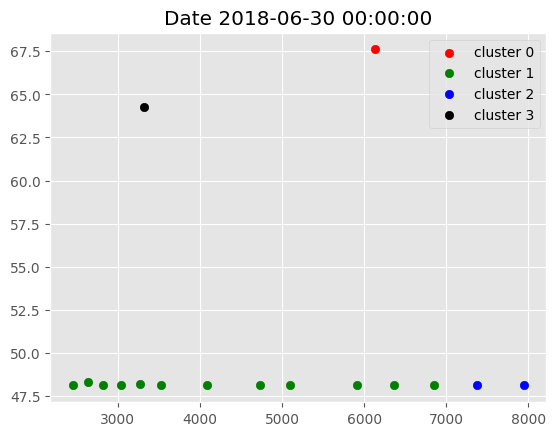

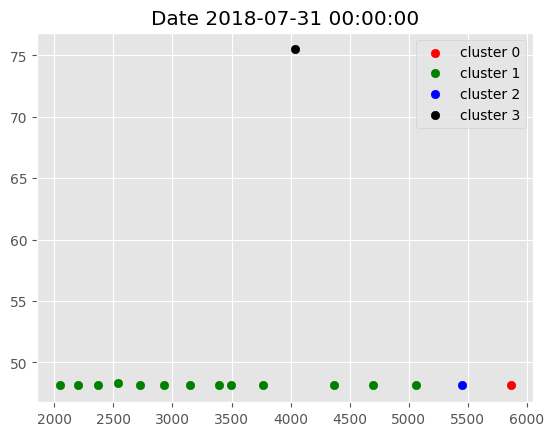

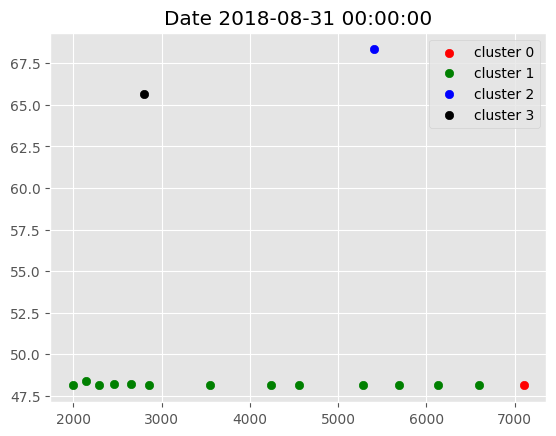

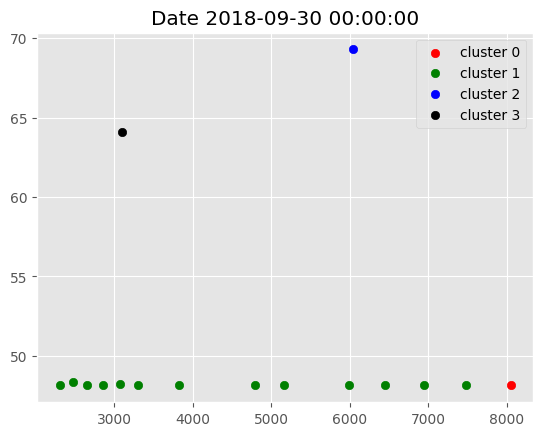

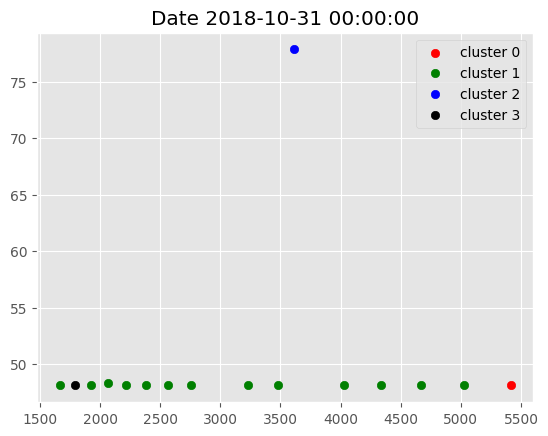

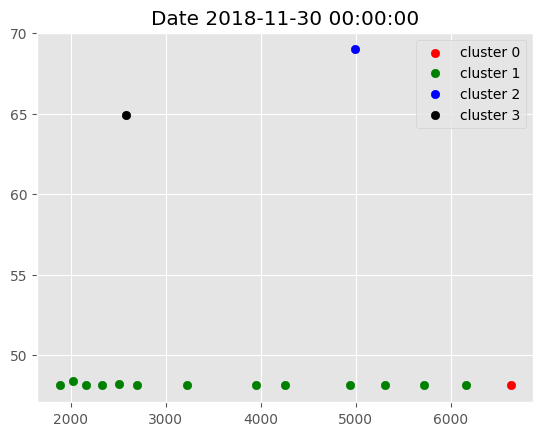

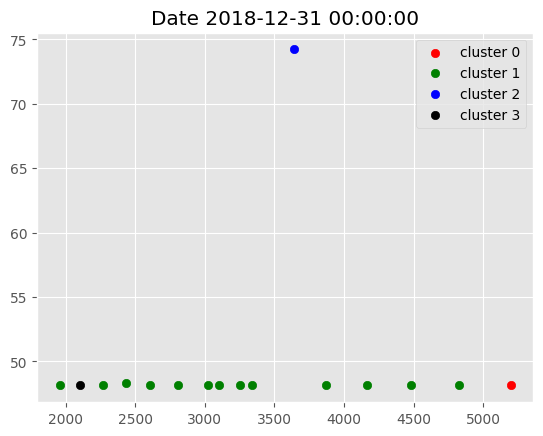

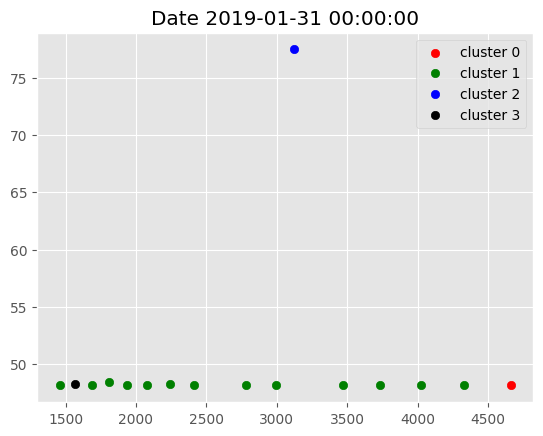

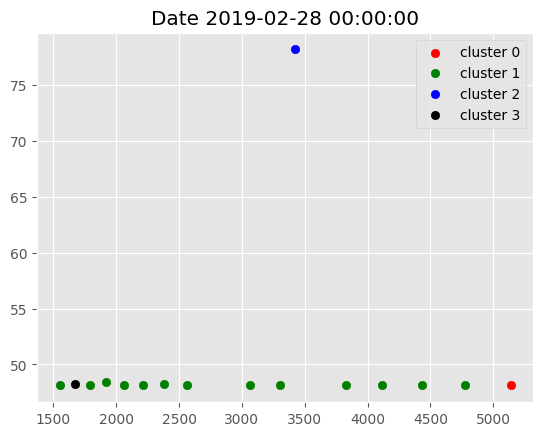

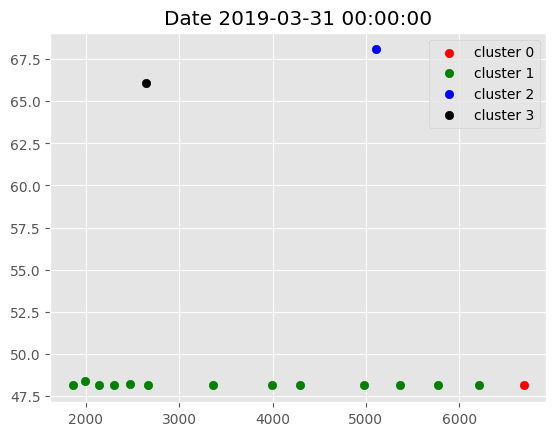

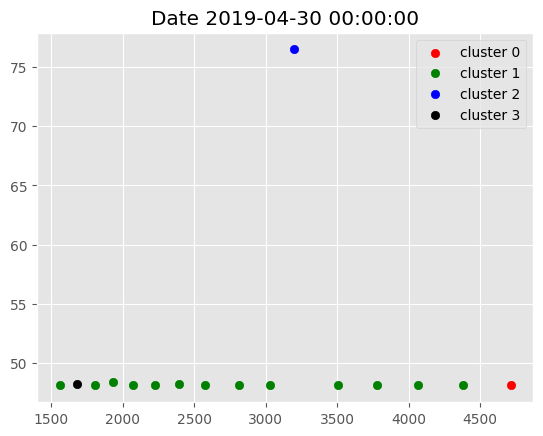

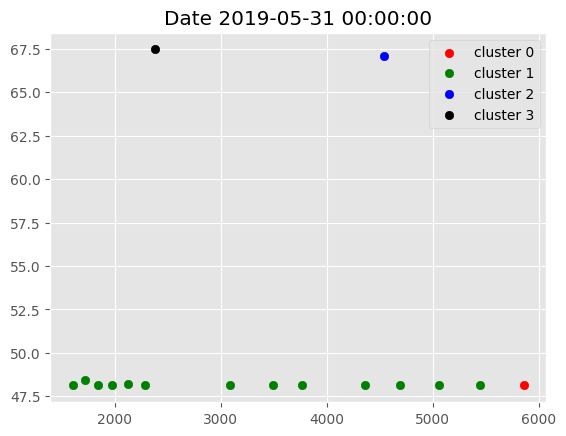

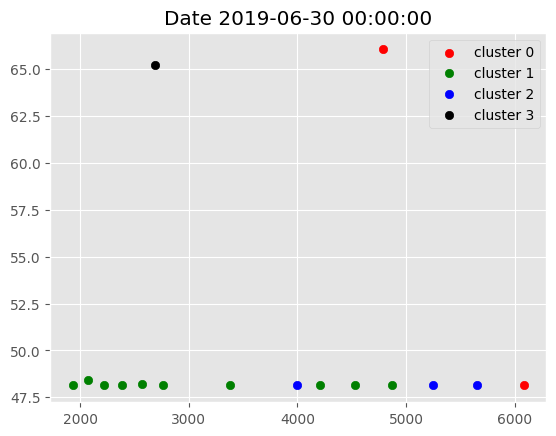

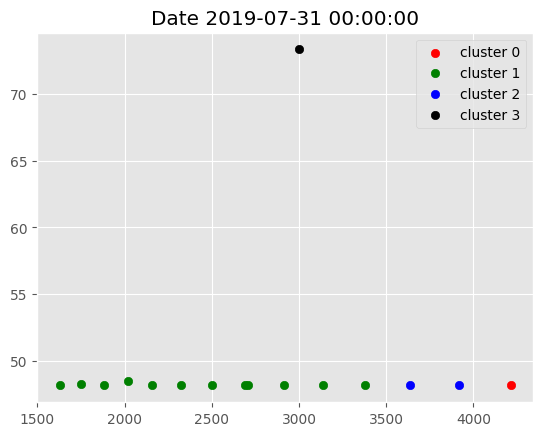

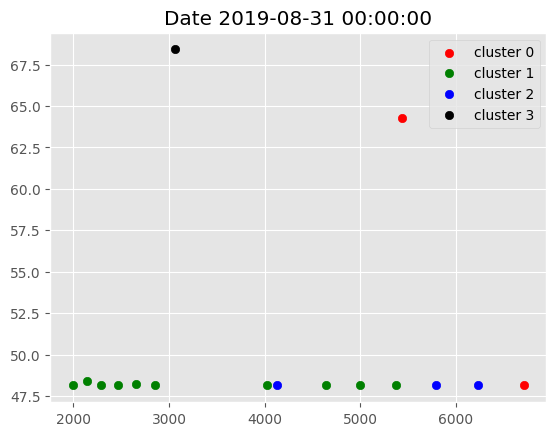

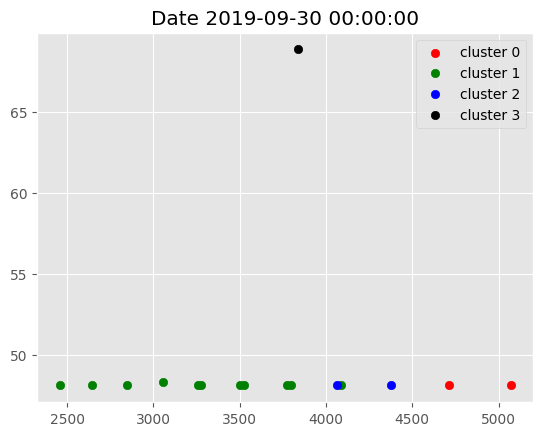

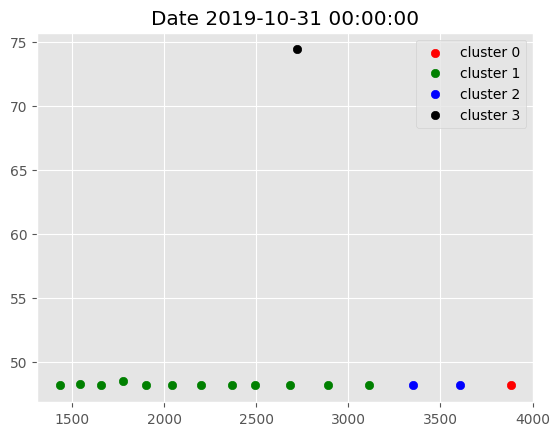

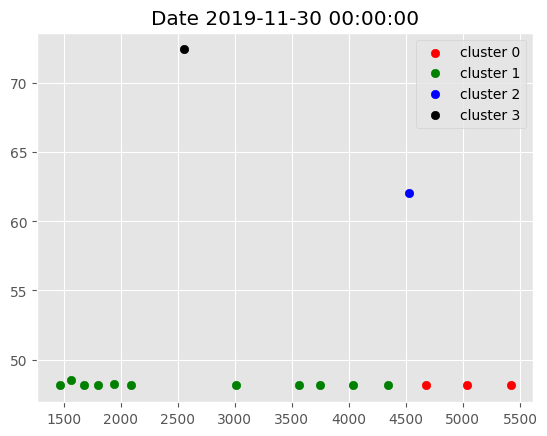

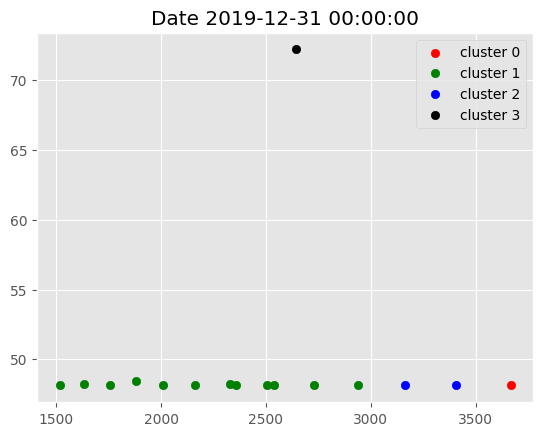

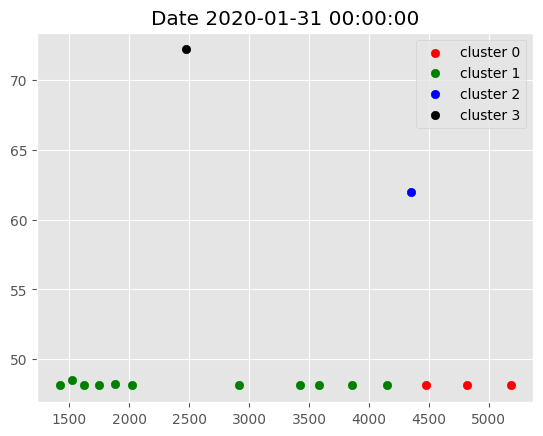

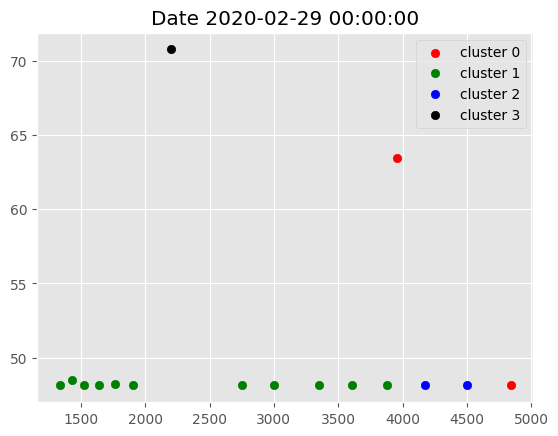

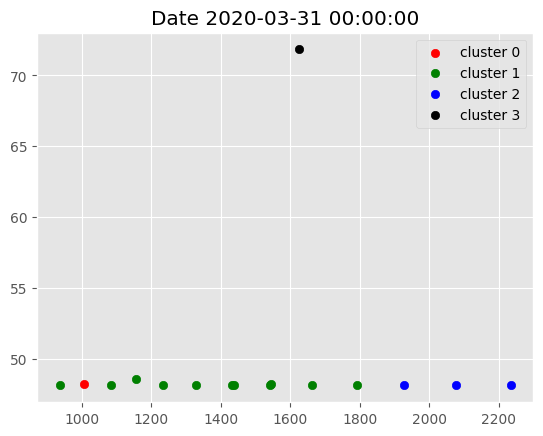

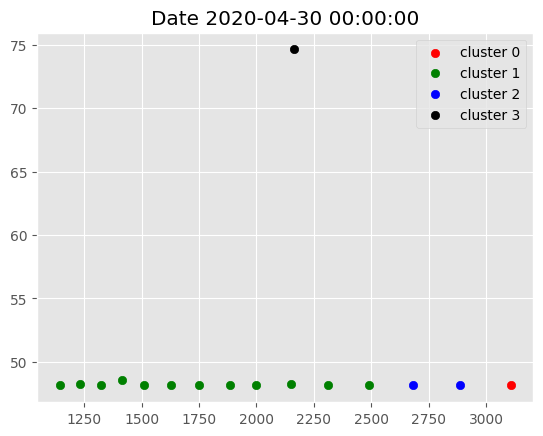

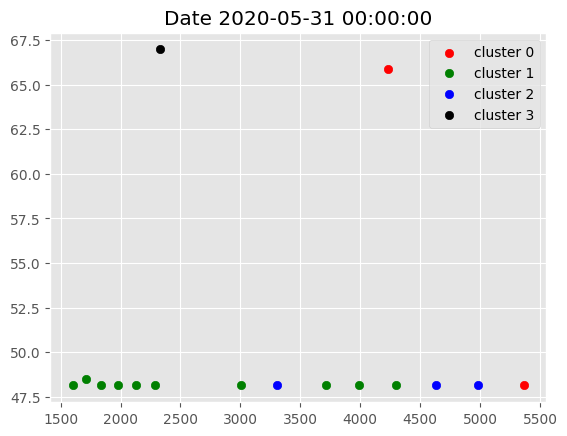

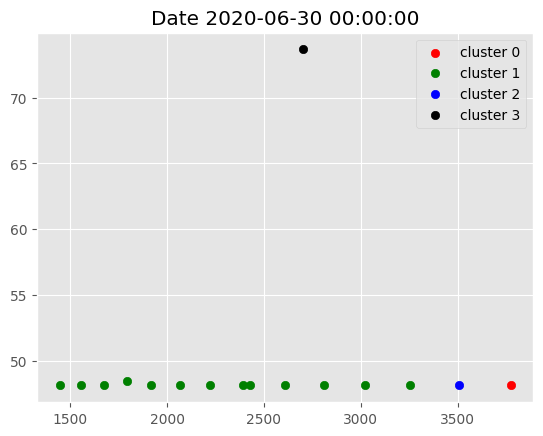

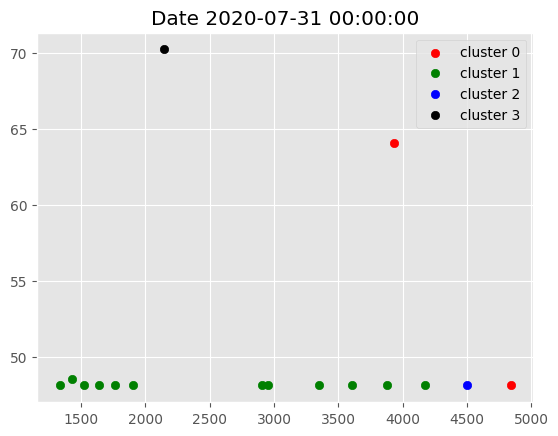

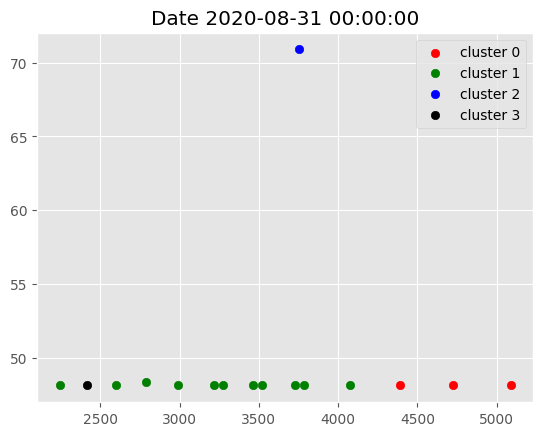

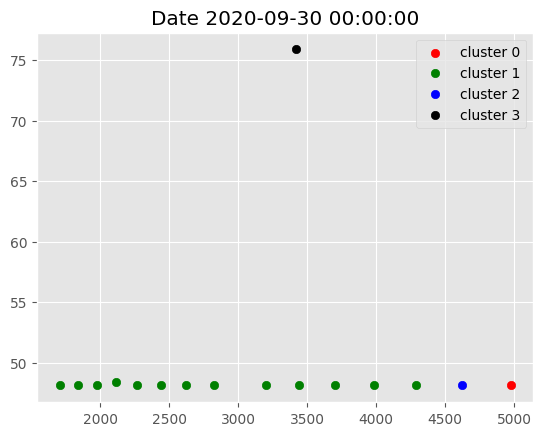

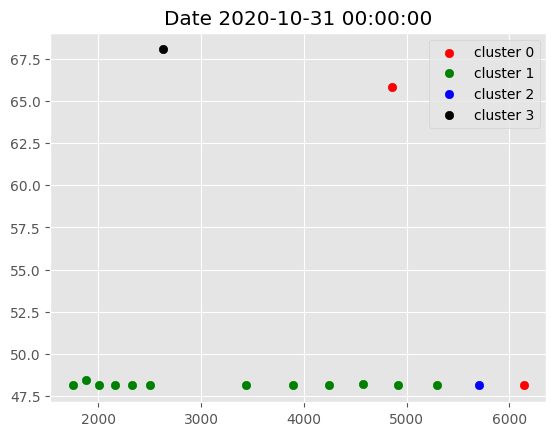

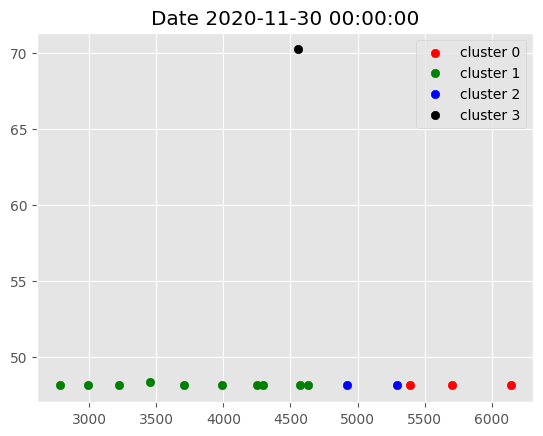

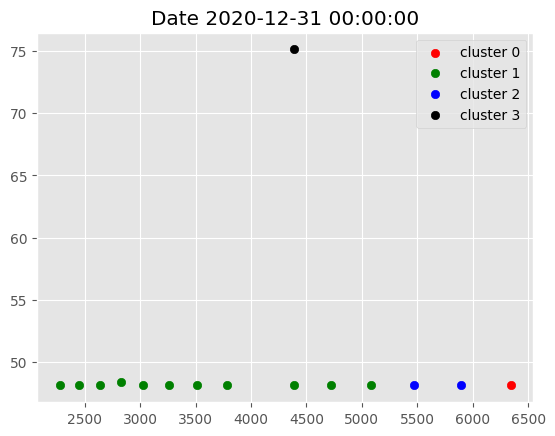

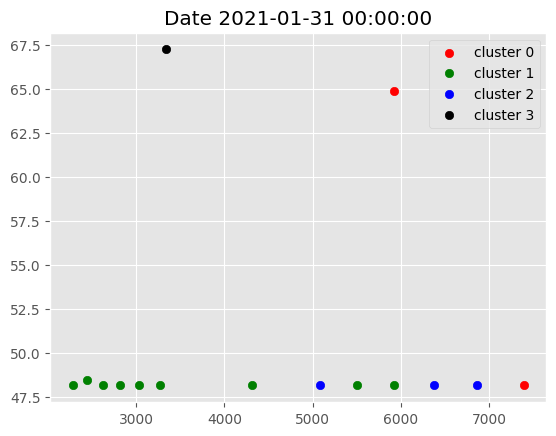

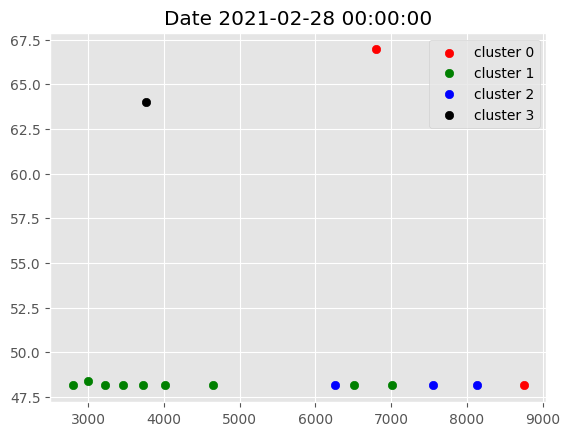

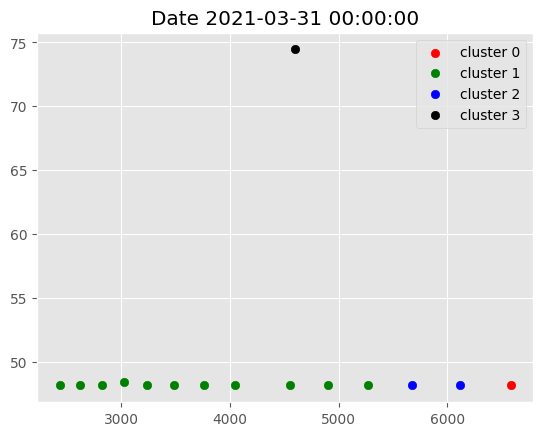

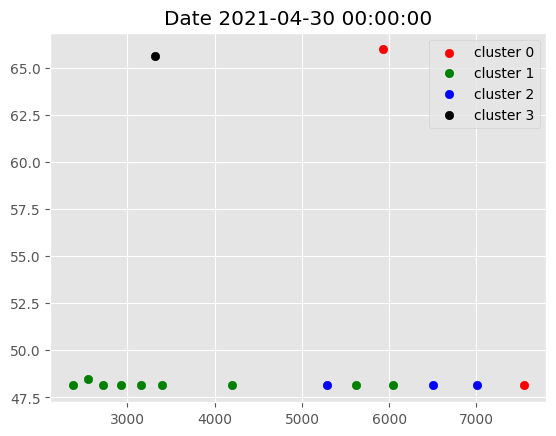

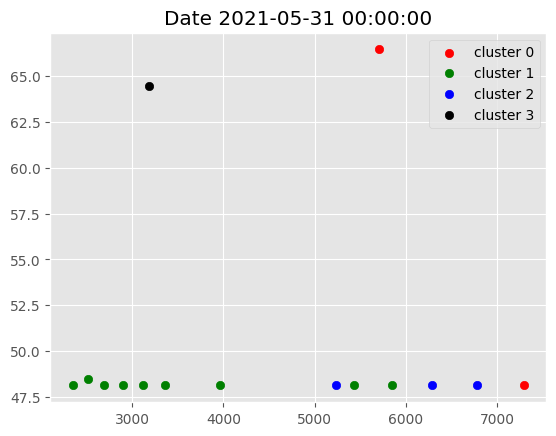

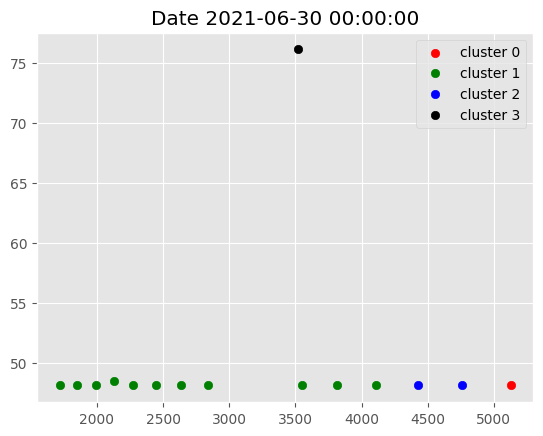

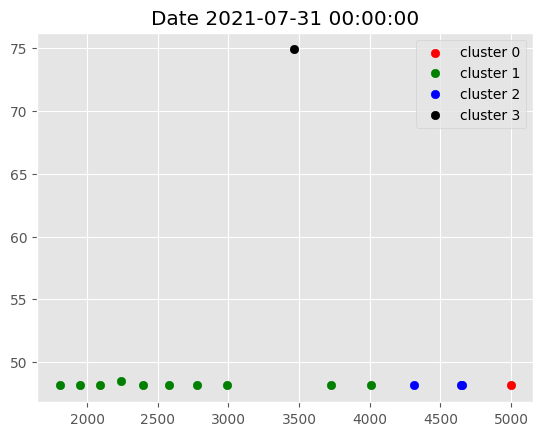

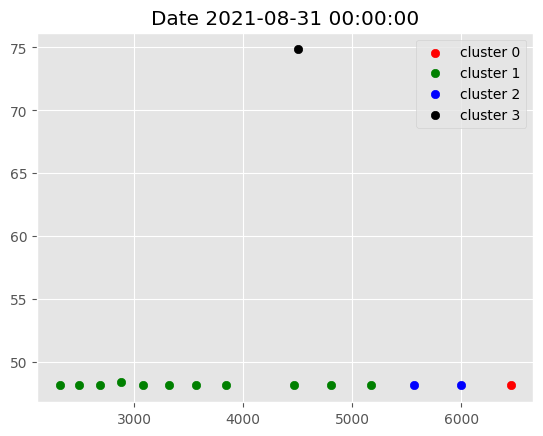

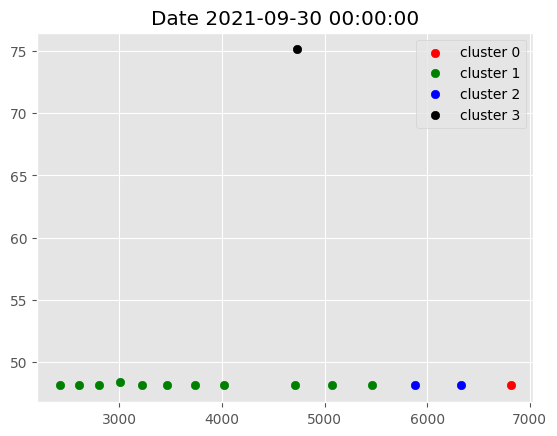

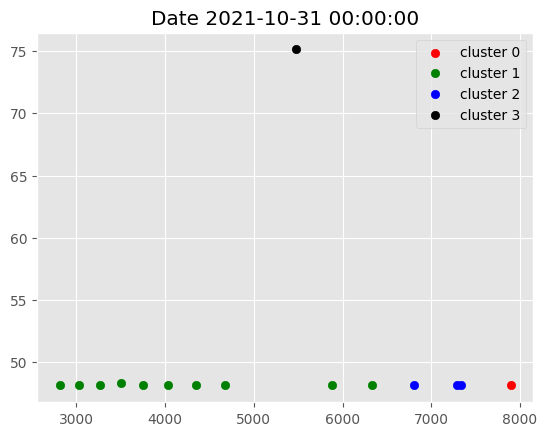

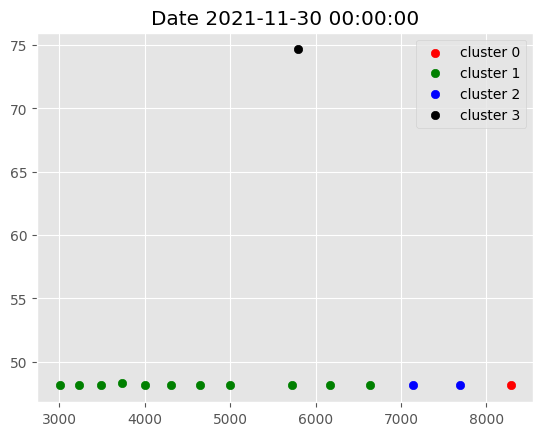

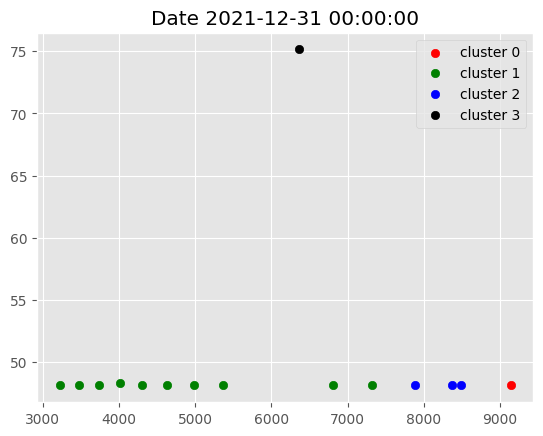

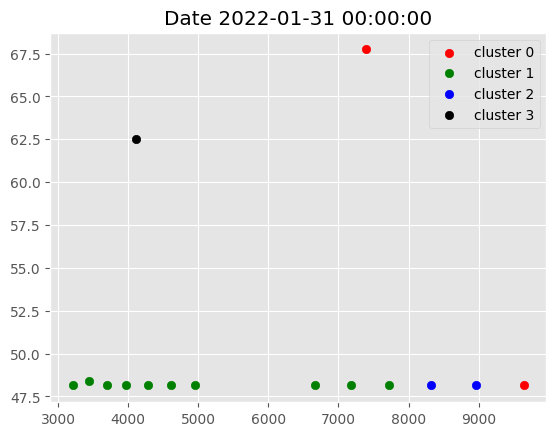

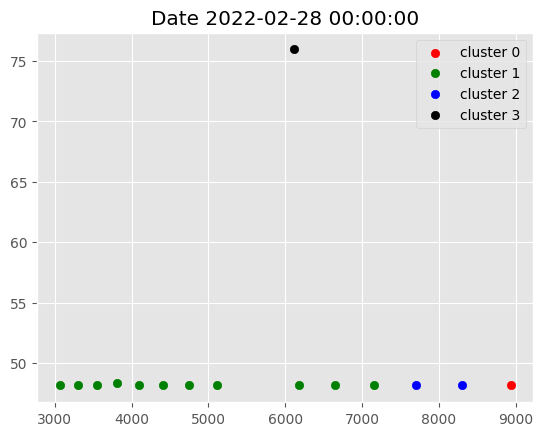

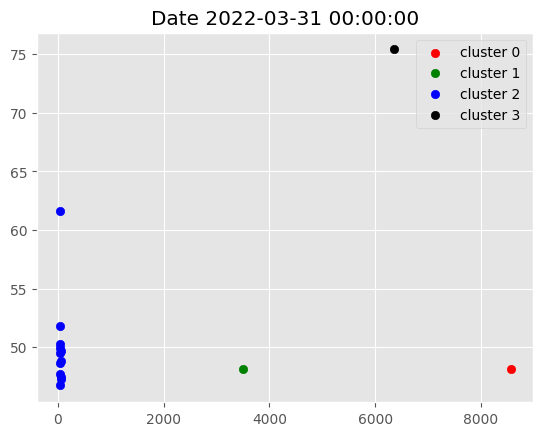

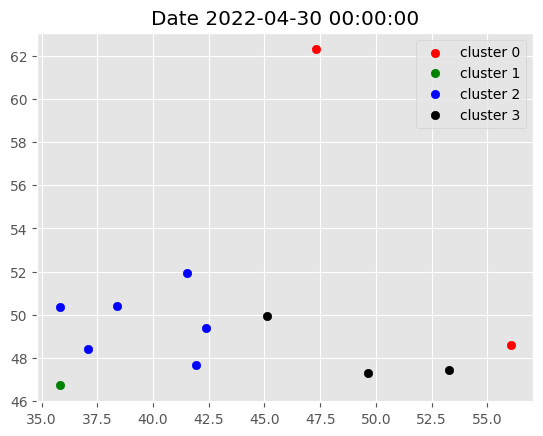

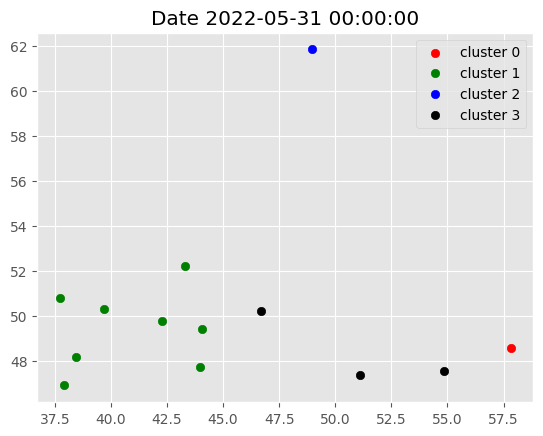

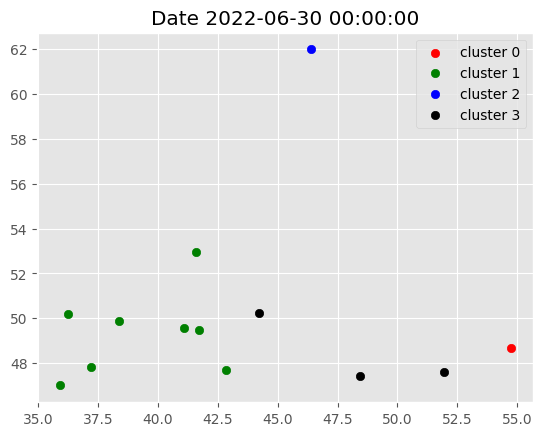

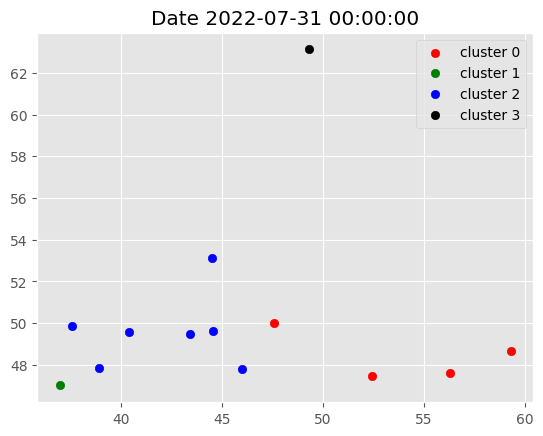

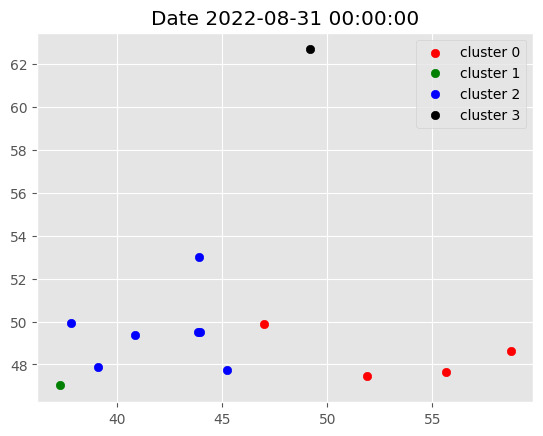

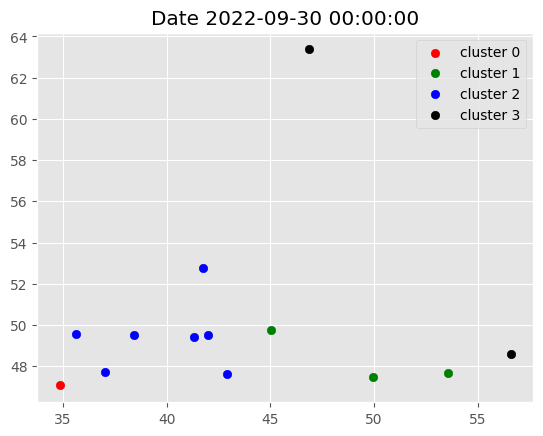

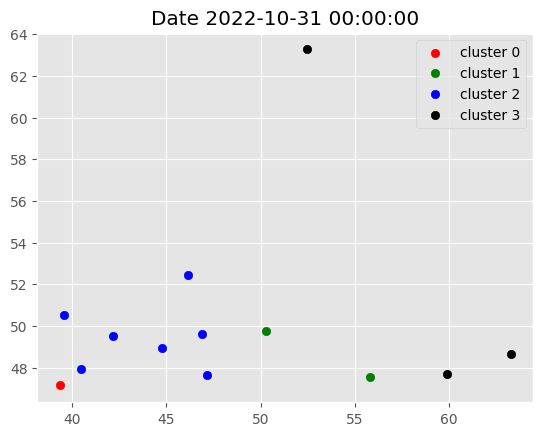

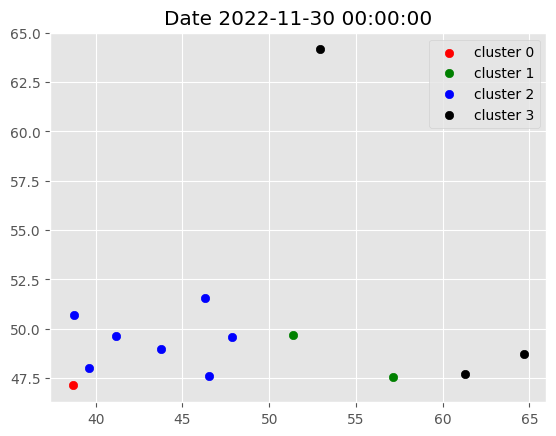

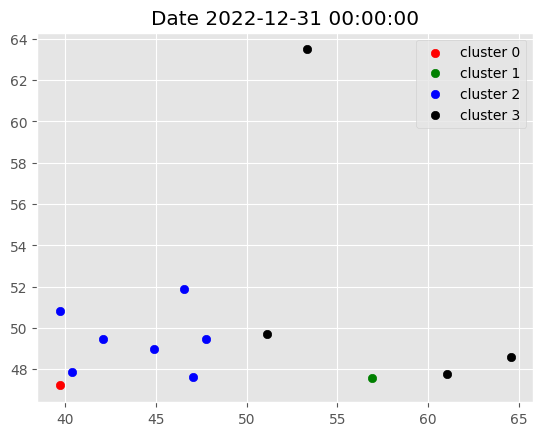

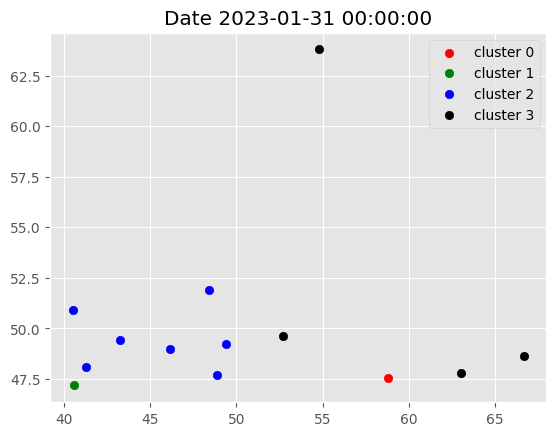

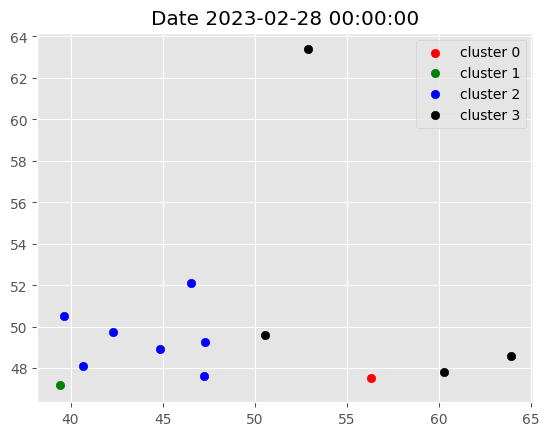

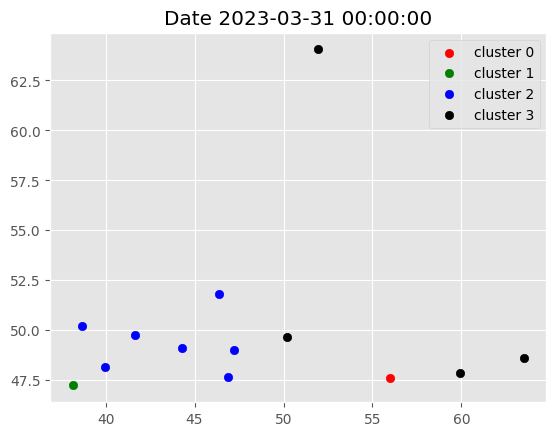

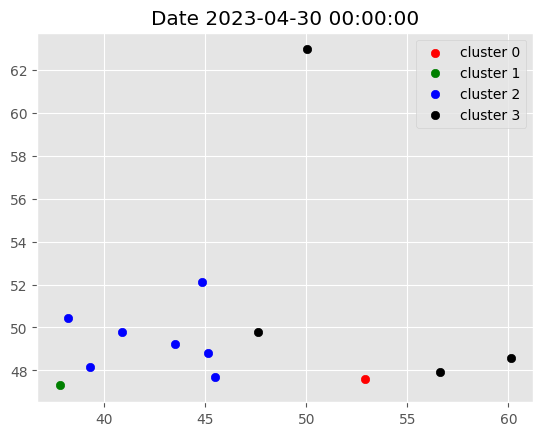

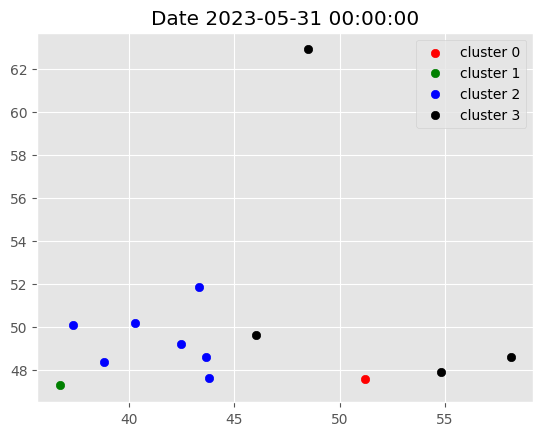

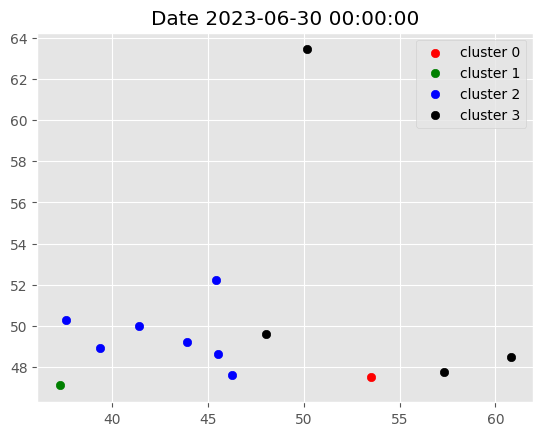

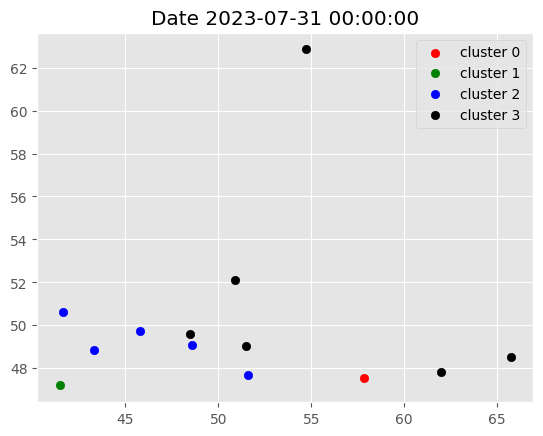

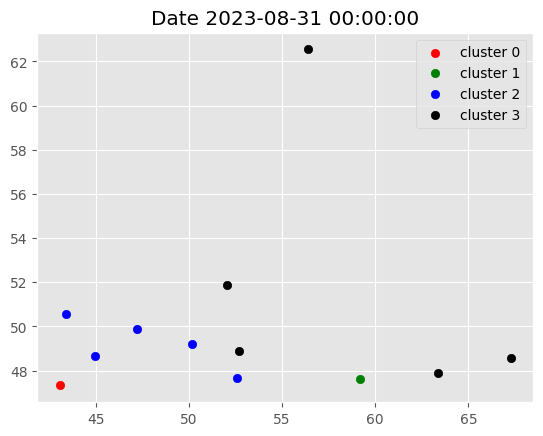

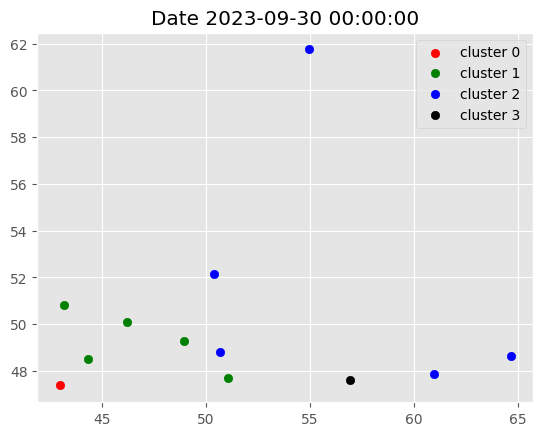

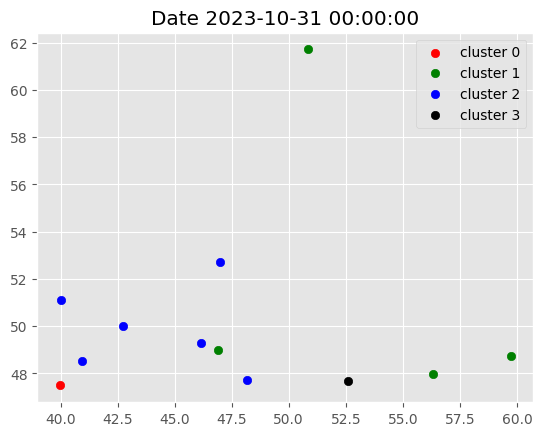

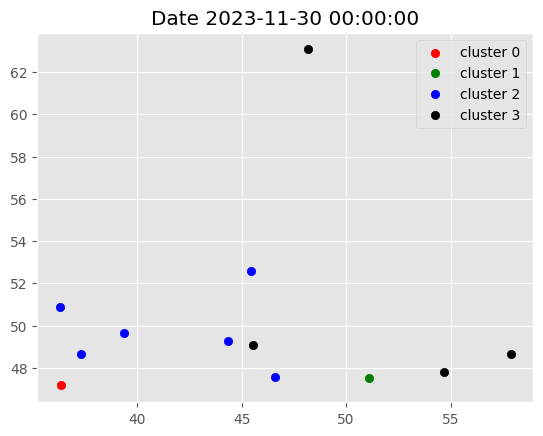

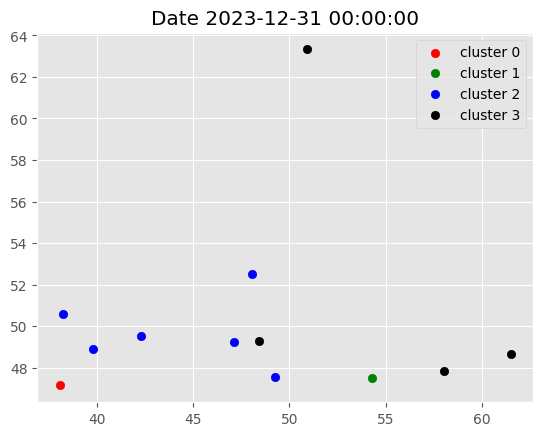

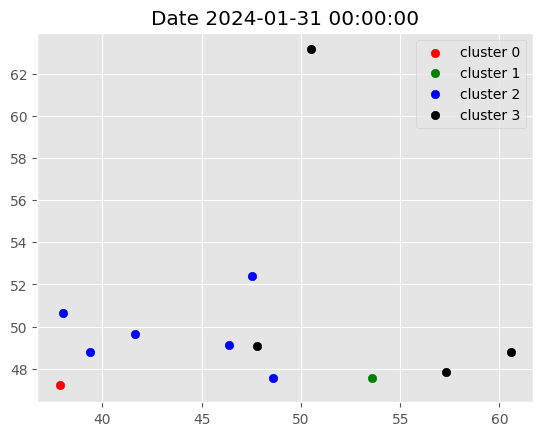

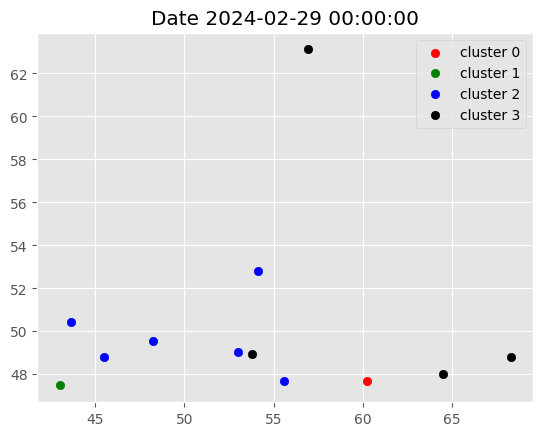

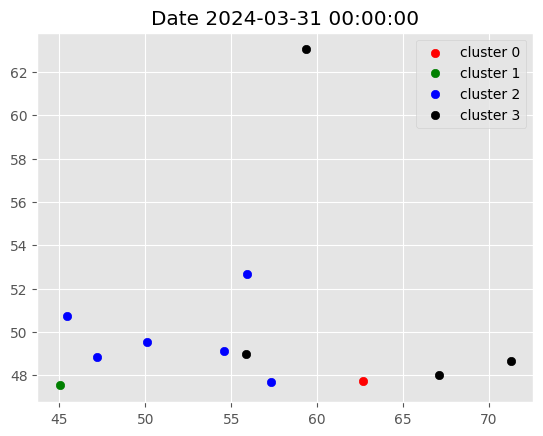

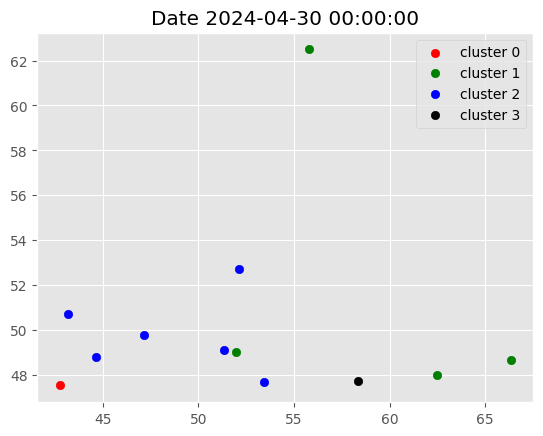

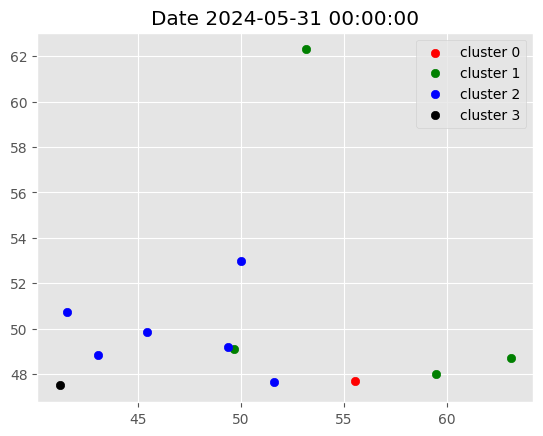

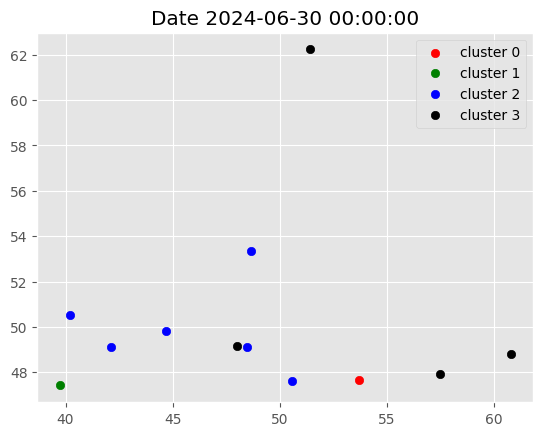

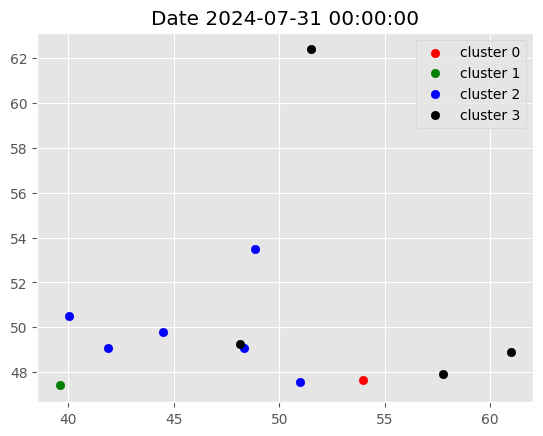

In [21]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [18]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 20))

initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [22]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2018-07-01': ['ITC'],
 '2018-08-01': ['KSB'],
 '2018-09-01': ['ITC'],
 '2018-10-01': ['ITC'],
 '2018-11-01': ['ITC'],
 '2018-12-01': ['ITC'],
 '2019-01-01': ['ITC'],
 '2019-02-01': ['ITC'],
 '2019-03-01': ['ITC'],
 '2019-04-01': ['ITC'],
 '2019-05-01': ['ITC'],
 '2019-06-01': ['ITC'],
 '2019-07-01': ['ITC'],
 '2019-08-01': ['KSB'],
 '2019-09-01': ['ITC'],
 '2019-10-01': ['KSB'],
 '2019-11-01': ['KSB'],
 '2019-12-01': ['ITC'],
 '2020-01-01': ['KSB'],
 '2020-02-01': ['ITC'],
 '2020-03-01': ['ITC'],
 '2020-04-01': ['KSB'],
 '2020-05-01': ['KSB'],
 '2020-06-01': ['ITC'],
 '2020-07-01': ['KSB'],
 '2020-08-01': ['ITC'],
 '2020-09-01': ['ITC'],
 '2020-10-01': ['KSB'],
 '2020-11-01': ['ITC'],
 '2020-12-01': ['KSB'],
 '2021-01-01': ['KSB'],
 '2021-02-01': ['ITC'],
 '2021-03-01': ['ITC'],
 '2021-04-01': ['KSB'],
 '2021-05-01': ['ITC'],
 '2021-06-01': ['ITC'],
 '2021-07-01': ['KSB'],
 '2021-08-01': ['KSB'],
 '2021-09-01': ['KSB'],
 '2021-10-01': ['KSB'],
 '2021-11-01': ['KSB'],
 '2021-12-01': [

In [23]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, 1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()


In [24]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  17 of 17 completed


Price       Adj Close                                                        \
Ticker            ACI        BDL        CCL        HAL     IDEA         IEX   
Date                                                                          
2017-06-30        NaN  27.013729  59.597763  37.556980  0.02178  103.698853   
2017-07-03        NaN  27.013729  59.306908  38.445126  0.02178  104.157669   
2017-07-05        NaN  27.013729  60.479404  37.688892  0.02178  104.130135   
2017-07-06        NaN  26.611206  59.515961  36.950226  0.01100  103.386864   
2017-07-07        NaN  26.611206  59.834080  36.739182  0.01100  104.726578   
...               ...        ...        ...        ...      ...         ...   
2024-07-24  20.190001  27.959999  18.190001  32.990002  0.01100  198.710007   
2024-07-25  20.379999  27.100000  17.100000  34.160000  0.01100  203.080002   
2024-07-26  20.450001  27.100000  17.270000  34.400002  0.01100  206.460007   
2024-07-29  19.969999  26.520000  17.250000  33.880001  0.01100  206.220001   
2024-07-30  19.700001        NaN  17.174999  34.355000      NaN  208.264999   

Price                                                    ...    Volume  \
Ticker           INFY           ITC   ITI           KSB  ...       ITC   
Date                                                     ...             
2017-06-30   6.191996  14000.000000  6.22  52272.699219  ...  253050.0   
2017-07-03   6.241467     41.092098  6.09  52272.699219  ...  826343.0   
2017-07-05   6.159017     40.601898  6.08  52363.601562  ...  386105.0   
2017-07-06   6.159017     40.030102  6.02  52727.300781  ...  310042.0   
2017-07-07   6.200242  13900.000000  6.12  51363.601562  ...  220000.0   
...               ...           ...   ...           ...  ...       ...   
2024-07-24  21.860001           NaN  4.74           NaN  ...       NaN   
2024-07-25  22.010000           NaN  4.89           NaN  ...       NaN   
2024-07-26  22.790001           NaN  4.90           NaN  ...       NaN   
2024-07-29  22.600000           NaN  4.75           NaN  ...       NaN   
2024-07-30  22.625000           NaN  4.82           NaN  ...       NaN   

Price                                                                        \
Ticker         ITI       KSB     MCX    MMTC     NCC    OIL     PFC     RBA   
Date                                                                          
2017-06-30  140400  375452.0  3100.0     0.0     0.0  450.0   43800  815700   
2017-07-03   88000  343167.0     0.0  7760.0     0.0    0.0   46400  427600   
2017-07-05   85300  520278.0   400.0  1000.0  1559.0  415.0   77200  530100   
2017-07-06   63200  668283.0  2800.0  1000.0     0.0  363.0   90400  370300   
2017-07-07   97300  446974.0  1600.0  2060.0     0.0  106.0   90800  551700   
...            ...       ...     ...     ...     ...    ...     ...     ...   
2024-07-24   97100       NaN     NaN     0.0     NaN    NaN  167700  640300   
2024-07-25   92200       NaN     NaN     0.0     NaN    NaN  170000  836700   
2024-07-26   44700       NaN     NaN     0.0     NaN    NaN  527300  761000   
2024-07-29   61600       NaN     NaN    40.0     NaN    NaN  417700  666400   
2024-07-30   38344       NaN     NaN     NaN     NaN    NaN  222589  505246   

Price                 
Ticker           TCS  
Date                  
2017-06-30    208200  
2017-07-03    291100  
2017-07-05    302800  
2017-07-06    269200  
2017-07-07    199100  
...              ...  
2024-07-24    406000  
2024-07-25  59654400  
2024-07-26   4416200  
2024-07-29   3989300  
2024-07-30    654055  

[1781 rows x 102 columns]

In [25]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'
'Adj Close'


""
